### Reconhecimento e análise inicial dos dados

Importar depêndencias para o projeto

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carregar bases de dados de cursos e avaliações

In [3]:
ratings = pd.read_csv('/Coursera_reviews.csv')

courses = pd.read_csv('/Coursera_courses.csv')

Visualização dos dados de avaliações

In [3]:
ratings

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454700,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454701,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454702,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454703,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


Visualização dos dados de cursos

In [5]:
courses

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training
...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution


Simples análise exploratória dos dados obtidos

In [6]:
n_ratings = len(ratings)
n_courses = ratings['course_id'].nunique()
n_users = ratings['reviewers'].nunique()

print(f'Número de avaliações: {n_ratings}')
print(f'Número de courseIds únicos: {n_courses}')
print(f'Número de usuários únicos: {n_users}')
print(f'Average number of ratings per user: {round(n_ratings/n_users, 2)}')
print(f'Average number of ratings per course: {round(n_ratings/n_courses, 2)}')

Número de avaliações: 1454705
Número de courseIds únicos: 604
Número de usuários únicos: 287808
Average number of ratings per user: 5.05
Average number of ratings per course: 2408.45


Visualização gráfica da distribuição de avaliações de cursos

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_18028\3874613578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='viridis')


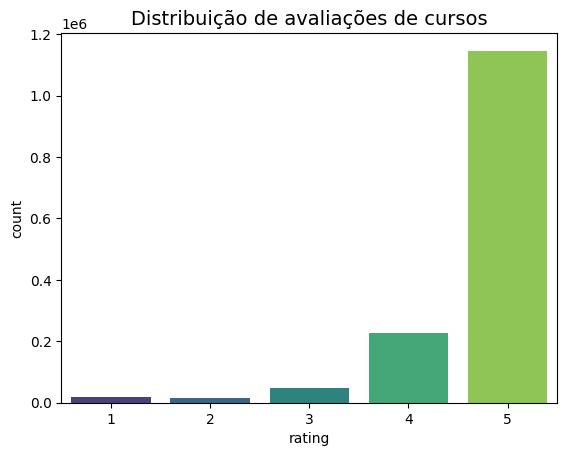

In [7]:
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribuição de avaliações de cursos', fontsize=14)
plt.show()

Cursos mais avaliados

In [8]:
course_ratings = pd.merge(courses, ratings, on='course_id', how='left')
course_ratings['name'].value_counts()[0:10]

name
Programming for Everybody (Getting Started with Python)                           45218
Machine Learning                                                                  35895
Neural Networks and Deep Learning                                                 35750
Technical Support Fundamentals                                                    35319
Python Data Structures                                                            33546
Learning How to Learn: Powerful mental tools to help you master tough subjects    32265
AI For Everyone                                                                   21630
Excel Skills for Business: Essentials                                             21251
What is Data Science?                                                             21087
The Science of Well-Being                                                         20085
Name: count, dtype: int64

### Pré-processamento dos dados

Adicionar iDs aos registros do dataframe de avaliações

In [4]:
reviewerIds = {reviewer: idx for idx, reviewer in enumerate(ratings['reviewers'].unique())}
ratings['userId'] = ratings['reviewers'].map(reviewerIds)
ratings.rename(columns={'course_id': 'courseId'}, inplace=True)
ratings = ratings[['userId', 'courseId', 'rating']]

ratings.head()

,userId,courseId,rating
0,0,google-cbrs-cpi-training,4
1,1,google-cbrs-cpi-training,4
2,2,google-cbrs-cpi-training,4
3,3,google-cbrs-cpi-training,4
4,4,google-cbrs-cpi-training,4


Remover avaliações duplicatas (usuário x avaliou curso y mais de uma vez) 

In [5]:
new_ratings = ratings.drop_duplicates(subset=['userId', 'courseId'])
print("\nDataFrame após a remoção de duplicatas:")
print(new_ratings)


DataFrame após a remoção de duplicatas:
         userId                  courseId  rating
0             0  google-cbrs-cpi-training       4
1             1  google-cbrs-cpi-training       4
2             2  google-cbrs-cpi-training       4
3             3  google-cbrs-cpi-training       4
4             4  google-cbrs-cpi-training       4
...         ...                       ...     ...
1454630  270550       computer-networking       5
1454633  151211       computer-networking       5
1454636  120056       computer-networking       5
1454637  122970       computer-networking       5
1454638  287807       computer-networking       5

[506116 rows x 3 columns]


Criação da matriz esparsa

In [6]:
from scipy.sparse import csr_matrix

def create_X(df):
    '''
    gera uma matriz esparsa com o dataframe de avaliações
    
    args (df): dataframe pandas com 3 colunas (userId, courseId, rating)
    
    retorno:
        X: matriz
        user_mapper: dicionário que mapeia ids de usuários para índices
        user_inv_mapper: dicionário que mapeia índices para ids
        course_mapper: dicionário que mapeia ids de cursos para índices
        course_inv_mapper: dicionário que mapeia índices para ids
    '''
    M = df['userId'].nunique()
    N = df['courseId'].nunique()

    user_mapper = dict(zip(np.unique(df['userId']), list(range(M))))
    course_mapper = dict(zip(np.unique(df['courseId']), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df['userId'])))
    course_inv_mapper = dict(zip(list(range(N)), np.unique(df['courseId'])))

    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [course_mapper[i] for i in df['courseId']]

    X = csr_matrix((df['rating'], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, course_mapper, user_inv_mapper, course_inv_mapper

X, user_mapper, course_mapper, user_inv_mapper, course_inv_mapper = create_X(new_ratings)

Verificar o shape da matriz gerada

In [7]:
X.shape

(287808, 604)

A matriz contém 604 cursos e 287.808 usuários

Verificar o valor de user_mapper para exemplificar

In [8]:
user_mapper

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [12]:
course_mapper

{'aboriginal-education': 0,
 'access-control-sscp': 1,
 'accounting-analytics': 2,
 'accounting-data-analytics-python': 3,
 'actualizacion-manejo-diabetes-tipo-2': 4,
 'addiction-and-the-brain': 5,
 'addiction-treatment': 6,
 'advanced-valuation-and-strategy': 7,
 'agile-atlassian-jira': 8,
 'ai-for-everyone': 9,
 'ai-for-medical-diagnosis': 10,
 'ai-for-medical-prognosis': 11,
 'algorithmic-toolbox': 12,
 'american-law': 13,
 'analytics-business-metrics': 14,
 'analytics-excel': 15,
 'anatomy403-1x': 16,
 'animal-welfare': 17,
 'antibiotic-stewardship': 18,
 'anticorrupcion-introduccion': 19,
 'applied-data-science-capstone': 20,
 'aprendiendo-a-aprender': 21,
 'aprendiendo-programar-python': 22,
 'arbitration-international-disputes': 23,
 'arts-heritage': 24,
 'astro': 25,
 'attention-models-in-nlp': 26,
 'aulaconstructivista': 27,
 'autism-spectrum-disorder': 28,
 'autodesk-autocad-design-drafting': 29,
 'autodesk-revit-architectural-design': 30,
 'aws-fundamentals-addressing-securi

In [9]:
id_desejado = 'python'

linha_nao_zero = None
for i, row in enumerate(X.toarray()):
    if np.sum(row) != 0:
        linha_nao_zero = i
        break

if linha_nao_zero is not None:
    print("Primeira linha não-zero encontrada na linha:", linha_nao_zero)
    print(X[linha_nao_zero])
else:
    print("Nenhuma linha não-zero encontrada na matriz.")

Primeira linha não-zero encontrada na linha: 0
  (0, 41)	3
  (0, 42)	4
  (0, 65)	1
  (0, 69)	4
  (0, 76)	5
  (0, 84)	4
  (0, 104)	5
  (0, 122)	4
  (0, 148)	5
  (0, 223)	4
  (0, 242)	5
  (0, 250)	4
  (0, 255)	5
  (0, 256)	5
  (0, 265)	5
  (0, 273)	4
  (0, 303)	5
  (0, 338)	5
  (0, 339)	5
  (0, 342)	4
  (0, 344)	5
  (0, 382)	5
  (0, 383)	5
  (0, 386)	5
  (0, 388)	4
  (0, 403)	4
  (0, 417)	5
  (0, 422)	5
  (0, 430)	5
  (0, 437)	5
  (0, 440)	5
  (0, 446)	5
  (0, 448)	5
  (0, 449)	5
  (0, 450)	3
  (0, 451)	2
  (0, 452)	5
  (0, 456)	1
  (0, 457)	5
  (0, 458)	5
  (0, 461)	5
  (0, 464)	5
  (0, 472)	5
  (0, 494)	5
  (0, 516)	5
  (0, 532)	2
  (0, 538)	5
  (0, 585)	2
  (0, 595)	5


Avaliação da esparsidade da matriz

In [10]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f'Esparsidade: {round(sparsity*100,2)}%')

Esparsidade: 0.29%


In [11]:
n_ratings_per_user = X.getnnz(axis=1)

n_ratings_per_course = X.getnnz(axis=0)
len(n_ratings_per_course)

print(f'O usuário mais ativo avaliou {n_ratings_per_user.max()} cursos.')
print(f'O usuário menos ativo {n_ratings_per_user.min()} cursos.')

print(f'O curso mais avaliado tem {n_ratings_per_course.max()} avaliações.')
print(f'O curso menos avaliado possui {n_ratings_per_course.min()} avaliações.')

O usuário mais ativo avaliou 370 cursos.
O usuário menos ativo 1 cursos.
O curso mais avaliado tem 14063 avaliações.
O curso menos avaliado possui 1 avaliações.


### Recomendações item-item com k-Nearest Neighbors

Encontrar os k cursos com os vetores de engajamento mais similares para um dado curso

In [12]:
from sklearn.neighbors import NearestNeighbors

def find_similar_courses(course_id, X, course_mapper, course_inv_mapper, k, metric='cosine'):
    '''
    encontra os k vizinhos para um dado id de curso
    
    args:
        course_id: id do curso para o perfil interessado
        X: matriz de utilidade user-item
        k: número de cursos similares a serem retornados
        metric: métrica para a distância do kNN
    
    saída: retorna uma lista de k ids de cursos similares
    '''
    X = X.T
    neighbour_ids = []
    
    course_ind = course_mapper[course_id]
    course_vec = X[course_ind]
    if isinstance(course_vec, (np.ndarray)):
        course_vec = course_vec.reshape(1,-1)

    # k+1 para excluir o id de interesse utilizado
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(course_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(course_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

Exemplo de uso da função

In [13]:
similar_courses = find_similar_courses('python', X, course_mapper, course_inv_mapper, k=6)
similar_courses

['python-data',
 'python-network-data',
 'python-databases',
 'machine-learning',
 'neural-networks-deep-learning']

Conversão dos ids de cursos para os respectivos títulos completos

In [14]:
course_titles = dict(zip(courses['course_id'], courses['name']))

course_id = 'producing-music'

new_similar_courses = find_similar_courses(course_id, X, course_mapper, course_inv_mapper, k=6)
course_title = course_titles[course_id]

print(f'Porque você avaliou {course_title}:')
for i in new_similar_courses:
    print(course_titles[i])

Porque você avaliou The Art of Music Production:
The Technology of Music Production
Developing Your Musicianship
Music Business Foundations
Songwriting: Writing the Lyrics
Machine Learning


### Redução de dimensionalidade com fatorização de matriz

In [15]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=30, n_iter=40)
Q = svd.fit_transform(X.T)
Q.shape

(604, 30)

In [16]:
course_id = 'python'
this_similar_courses = find_similar_courses(course_id, Q.T, course_mapper, course_inv_mapper, metric='cosine', k=6)
course_title = course_titles[course_id]

print(f"Because you reviewed {course_title}:")
for i in this_similar_courses:
    print(course_titles[i])

Because you reviewed Programming for Everybody (Getting Started with Python):
Foundations of Data Science: K-Means Clustering in Python
Corporate & Commercial Law I: Contracts & Employment Law
Introduction to Economic Theories
Programming Fundamentals
Privacy Law and Data Protection
